In [1]:
# Import dependencies
import pandas as pd

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
X = df.drop('koi_disposition',axis=1)
y = df['koi_disposition']

[0.1333495  0.16678114 0.12910454 0.05413886 0.01632799 0.01569978
 0.01472048 0.01259896 0.0240155  0.02387829 0.01194563 0.01146729
 0.00964515 0.01741066 0.02732504 0.02619305 0.02255104 0.01313646
 0.01201759 0.012742   0.01163479 0.0108975  0.01379224 0.00909078
 0.00948269 0.00824567 0.03022978 0.01149941 0.009973   0.01922642
 0.01585051 0.01051446 0.01045266 0.01301082 0.00859111 0.01194993
 0.00898023 0.01125886 0.01000113 0.01026908]


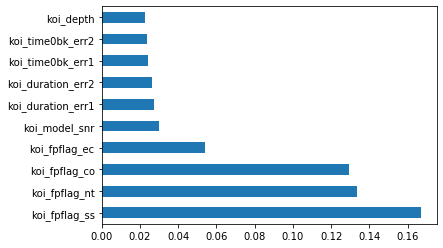

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [5]:
# Set features on the basis of importance
X = df[feat_importances.index]
y = df['koi_disposition']
#print(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 5, Train/Test Score: 0.878/0.820
k: 8, Train/Test Score: 0.864/0.822
k: 11, Train/Test Score: 0.848/0.828
k: 14, Train/Test Score: 0.849/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 20, Train/Test Score: 0.842/0.827
k: 23, Train/Test Score: 0.840/0.826


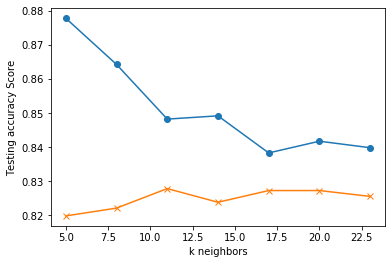

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(5, 25, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(5, 25, 3), train_scores, marker='o')
plt.plot(range(5, 25, 3), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)
print('k=20 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=20 Test Acc: 0.827


In [11]:
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn2 = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(15, 25)))


grid_model = GridSearchCV(knn2, param_grid, cv=100, scoring='accuracy', verbose=1)

In [12]:
grid_model.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24]},
             scoring='accuracy', verbose=1)

In [13]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'n_neighbors': 22}
0.8268033381712627


In [15]:
import joblib
filename = 'knn.sav'
joblib.dump(grid_model, filename)

['Sood_knn.sav']